In [1]:
import os
os.chdir('../')

In [3]:
import nibabel as nb
import numpy as np

import trimeshpy
#from trimeshpy.trimesh_vtk import TriMesh_Vtk
from trimeshpy.trimeshflow_vtk import TriMeshFlow_Vtk
from trimeshpy.vtk_util import lines_to_vtk_polydata, save_polydata

import time

In [4]:
surface_file = '/Users/kristianeschenburg/Desktop/Research/Data/Surfaces/285345.L.acpc_dc.white.32k_fs_LR.surf.gii'
surface = nb.load(surface_file)

triangles = surface.darrays[1].data
vertices = surface.darrays[0].data

In [5]:
#mesh = TriMesh_Vtk(triangles=triangles,vertices=vertices)
tri_mesh_flow = TriMeshFlow_Vtk(triangles, vertices)

In [7]:
# Test parameters
nb_step = 10
diffusion_step = 5
saved_flow = trimeshpy.data.output_test_flow
saved_fib = trimeshpy.data.output_test_fib

# Test functions
start = time.time()
#points = tri_mesh_flow.laplacian_smooth(nb_step, diffusion_step, l2_dist_weighted=False, area_weighted=False, backward_step=False, flow_file=saved_flow)
#points = tri_mesh_flow.curvature_normal_smooth(nb_step, diffusion_step, area_weighted=True, backward_step=True, flow_file=saved_flow)
#points = tri_mesh_flow.positive_curvature_normal_smooth(nb_step, diffusion_step, area_weighted=True, backward_step=True, flow_file=saved_flow)
#points = tri_mesh_flow.mass_stiffness_smooth(nb_step, diffusion_step, flow_file=saved_flow)
points = tri_mesh_flow.positive_mass_stiffness_smooth(nb_step, diffusion_step, flow_file=saved_flow)
#points = tri_mesh_flow.volume_mass_stiffness_smooth(nb_step, diffusion_step, flow_file=saved_flow)
stop = time.time()
print (stop - start)

 step 10 on 10 done 
12.702150821685791


In [8]:
lines = np.memmap(saved_flow, dtype=np.float64, mode='r', shape=(nb_step, vertices.shape[0], vertices.shape[1]))
tri_mesh_flow.set_vertices_flow(np.array(lines))
tri_mesh_flow.display(display_name="Trimeshpy: Flow resulting surface")
tri_mesh_flow.display_vertices_flow(display_name="Trimeshpy: Flow visualization")


/Users/kristianeschenburg/anaconda3/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


In [12]:
lines.shape

(10, 32492, 3)

In [17]:
da = surface.darrays[0]

for l in np.arange(lines.shape[0]):
    
    coords = np.asarray(lines[l,:,:]).astype(np.float32)
    da.data = coords
    surface.darrays[0] = da
    
    fp = '/Users/kristianeschenburg/Desktop/Flow.L.{:}.surf.gii'.format(l+1)
    nb.gifti.write(filename=fp,image=surface)

/Users/kristianeschenburg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: giftiio.write function deprecated. Use nibabel.load() instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  # Remove the CWD from sys.path while we load stuff.


In [168]:
from dipy import core
from dipy.core import geometry

In [144]:
surf_target = '/Users/kristianeschenburg/Desktop/Flow.L.20.surf.gii'
surf_target = nb.load(surf_target)
vertices_target = surf_target.darrays[0].data

surf_source = '/Users/kristianeschenburg/Desktop/Flow.L.10.surf.gii'
surf_source = nb.load(surf_source)
vertices_source = surf_source.darrays[0].data

In [184]:
mvmt = vertices_target - vertices_source
normed_mvmt = mvmt / np.linalg.norm(mvmt,axis=1)[:,None]

In [198]:
_, theta, phi = geometry.cart2sphere(mvmt[:,0],mvmt[:,1],mvmt[:,2])

In [199]:
import pandas as pd

In [200]:
data = {'theta': theta,
        'phi': phi}

In [206]:
df = pd.DataFrame(data)
df.to_csv('/Users/kristianeschenburg/Desktop/Test.CSV.csv',sep='\t',index=False,header=False)

In [35]:
np.save('/Users/kristianeschenburg/Desktop/TestFlowLines.npz',lines)

In [13]:
os.chdir('/Users/kristianeschenburg/Documents/Code/surfaceflow/')
from importlib import reload

In [17]:
import flowlength
reload(flowlength)

<module 'flowlength' from '/Users/kristianeschenburg/Documents/Code/surfaceflow/flowlength.py'>

In [19]:
lengths = flowlength.flowlengths(lines)

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

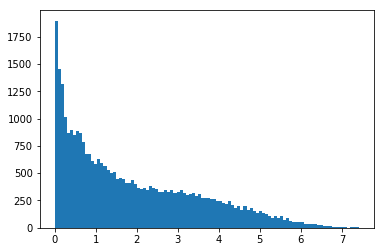

In [21]:
plt.hist(lengths,100);

In [22]:
from niio import write, loaded

In [23]:
write.save(lengths,'/Users/kristianeschenburg/Desktop/FlowLengths.func.gii','CortexLeft')

In [66]:
curv = loaded.load('/Users/kristianeschenburg/Desktop/Research/Data/Curvature/285345.L.curvature.32k_fs_LR.shape.gii')
sulc = loaded.load('/Users/kristianeschenburg/Desktop/Research/Data/SulcalDepth/285345.L.sulc.32k_fs_LR.shape.gii')

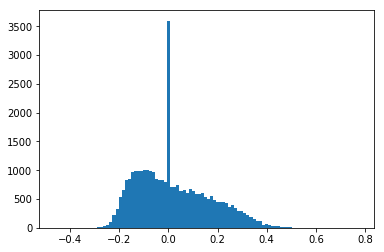

In [63]:
plt.hist(curv,100);

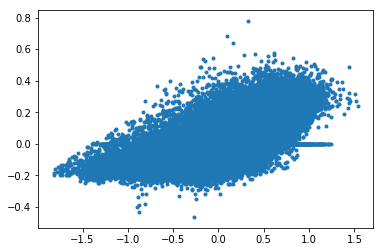

In [69]:
plt.scatter(sulc,curv,marker='.')

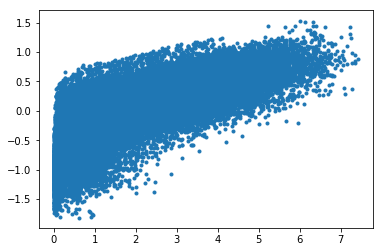

In [67]:
plt.scatter(lengths,sulc,marker='.')

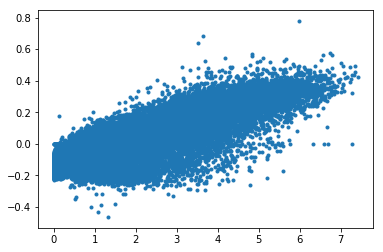

In [65]:
plt.scatter(lengths,curv,marker='.')